In [1]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# gill sans
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
import sys 
sys.path.append("..") 
import utils


## Serverless functions generate significant carbon footprint during their keep-alive period

In [2]:
kats = [2,4,6,8,10]
carbon_intensity = 100 # gCO2/kWh
server_pair = ['m5zn','m5zn']
apps = ['video','bfs-1000k','dna']
cold_start =  True

In [3]:


kat_carbon = []
st_carbon = []
for app in apps:
    
    for kat in kats:
        a,b =utils.compute_exe(app, server_pair,carbon_intensity)
        kat_c = utils.compute_kat(app, server_pair[0], kat, carbon_intensity)
        if cold_start:
            st_carbon.append(a[0])
        else:
            st_carbon.append(b[0])
        kat_carbon.append(kat_c)


[<Axes: > <Axes: > <Axes: >]


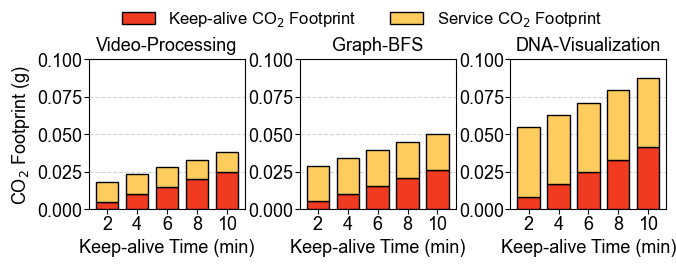

In [4]:
# box plot of data
fig, axs = plt.subplots(nrows=1, ncols=len(apps), gridspec_kw={'hspace': 1, 'wspace': 0.35, 'bottom': 0.2, 
                    'top': 0.8, 'right':0.995, 'left':0.17}, figsize=(7,2.5))
x = np.arange(len(kats))
XLABELS = [str(k) for k in kats]
TITLES = ["Video-Processing", "Graph-BFS","DNA-Visualization"]
colors="#d0efb1"
print(axs)
for i, ax in enumerate(axs):
    data1 = kat_carbon[5*i:5*(i+1)]
    data2 = st_carbon[5*i:5*(i+1)]
    ax.bar(x, data1, width=0.75, zorder=3, edgecolor='black', linewidth=1, color='#f03b20',label="Keep-alive Carbon")
    ax.bar(x, data2,width=0.75, zorder=3,color='#fecc5c',edgecolor='black', label="Service Carbon", bottom=data1)
    ax.set_title(TITLES[i], fontsize=13)
    ax.set_xticks(x)
    ax.set_xticklabels(XLABELS)
    ax.grid(which='both', axis='y', color='lightgrey', ls='dashed', zorder=0)
    ax.set_xlabel("Keep-alive Time (min)", fontsize=13)
    ax.set_ylim(0, 0.1)
    ax.tick_params(axis='both', which='major', pad=1, labelsize=13)
axs[0].set_ylabel('CO$_2$ Footprint (g)', fontsize=13)

fig.legend(loc=(0.17,0.865), frameon = False ,ncol=2,labels=['Keep-alive CO$_2$ Footprint', 'Service CO$_2$ Footprint'],fontsize=12)

plt.savefig("motiv1.pdf",bbox_inches='tight')
